<a href="https://colab.research.google.com/github/CuriousCaliBoi/AgniKai/blob/main/Attention_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q[0]:
 tensor([[-0.9500, -0.5700,  2.4100,  4.2700,  0.6800,  0.4100,  1.2800, -2.1700],
        [ 0.9300,  0.7300, -1.5900,  3.8100,  1.5800,  0.2800,  1.4400,  1.1800],
        [ 0.9300, -0.0000, -0.9400, -3.5400, -2.0100,  1.8300, -3.3200, -0.9800],
        [-0.3900,  2.6000,  2.6000,  0.8600,  0.8700,  0.9400, -3.7400,  1.9000],
        [-1.3300,  1.4000, -2.4400, -0.6600, -2.9400, -0.5600, -2.2800,  0.4400],
        [-0.0600, -2.5000,  6.1600, -0.3600,  0.0300, -0.5300, -1.3800, -3.4800]])
K[0]:
 tensor([[-0.5500, -2.0300,  4.9000,  3.0900,  2.5700, -0.9300, -1.5200, -3.1400],
        [-0.9600, -4.4500,  0.8400,  4.6200,  1.0600, -2.8100, -0.1100, -2.8400],
        [ 4.1200,  0.8300, -2.5900,  0.0700, -3.0700,  0.9000,  0.6200,  3.5800],
        [-0.4500, -2.1500, -0.2800,  4.5400, -2.7300, -0.4200, -1.4600,  0.4900],
        [ 2.8000, -2.7100, -1.0900,  2.3300, -3.3400,  2.7300, -1.2700,  0.1500],
        [-1.2000,  4.3600, -2.9400, -3.2400, -0.4600, -0.1200, -3.1300, -0.8400]])


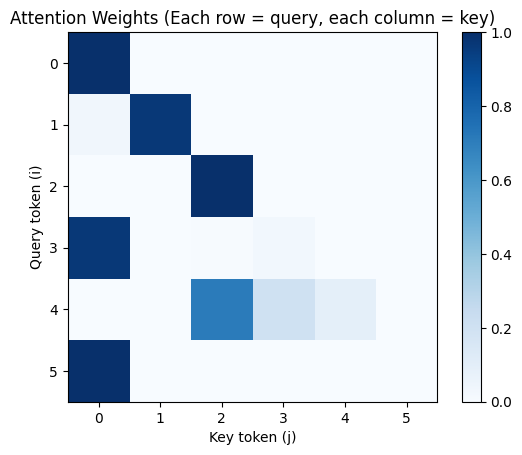

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Settings
B, T, d_model = 1, 6, 8  # batch size, sequence length, model dim
x = torch.randn(B, T, d_model)

# Linear projections for Q, K, V
W_Q = torch.randn(d_model, d_model)
W_K = torch.randn(d_model, d_model)
W_V = torch.randn(d_model, d_model)

Q = x @ W_Q  # (1, 6, 8)
K = x @ W_K
V = x @ W_V

# Scaled dot-product attention
scores = Q @ K.transpose(-1, -2) / (d_model ** 0.5)  # (1, 6, 6)

# Causal mask (lower triangular)
mask = torch.tril(torch.ones(T, T)).bool()
scores_masked = scores.masked_fill(~mask, float('-inf'))

attn_weights = F.softmax(scores_masked, dim=-1)
output = attn_weights @ V  # (1, 6, 8)

# Print shapes and values clearly
print("Q[0]:\n", Q[0].round(decimals=2))
print("K[0]:\n", K[0].round(decimals=2))
print("Raw Scores:\n", scores[0].round(decimals=2))
print("Masked Softmax Attention Weights:\n", attn_weights[0].round(decimals=2))
print("Final Output:\n", output[0].round(decimals=2))

# Visualize attention
plt.imshow(attn_weights[0].detach().numpy(), cmap='Blues')
plt.title("Attention Weights (Each row = query, each column = key)")
plt.xlabel("Key token (j)")
plt.ylabel("Query token (i)")
plt.colorbar()
plt.show()

In [ ]:
import torch
import torch.nn.functional as F

# Settings
batch_size = 1
seq_len = 3
embed_dim = 4
num_heads = 2
head_dim = embed_dim // num_heads
scale = head_dim ** 0.5

# Input: 3 tokens, each with 4-dim embeddings
X = torch.randn(batch_size, seq_len, embed_dim)  # (1, 3, 4)

# Linear projections for Q, K, V
W_q = torch.randn(embed_dim, embed_dim)
W_k = torch.randn(embed_dim, embed_dim)
W_v = torch.randn(embed_dim, embed_dim)

Q = X @ W_q  # (1, 3, 4)
K = X @ W_k  # (1, 3, 4)
V = X @ W_v  # (1, 3, 4)

# Reshape for multi-head attention
# From (1, 3, 4) -> (1, 2, 3, 2): batch, heads, tokens, head_dim
def split_heads(x):
    B, T, C = x.size()
    return x.view(B, T, num_heads, head_dim).transpose(1, 2)

Q = split_heads(Q)
K = split_heads(K)
V = split_heads(V)

# Attention scores: (B, heads, T, T)
scores = Q @ K.transpose(-2, -1) / scale

# Apply softmax to get attention weights
weights = F.softmax(scores, dim=-1)

# Attention output: (B, heads, T, head_dim)
attn_out = weights @ V

# Concatenate heads: (1, 3, 4)
def combine_heads(x):
    B, H, T, D = x.size()
    return x.transpose(1, 2).contiguous().view(B, T, H * D)

output = combine_heads(attn_out)

# Final linear projection (optional)
W_o = torch.randn(embed_dim, embed_dim)
final_output = output @ W_o  # (1, 3, 4)

print("Final MHA Output:", final_output)